# Stock Price Trend Analysis with LSTM (Keras)

LSTM - Long Short Term Memory

In [8]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for 

Lets load the data and prepare it.

In [5]:
import yfinance as yf

In [29]:
# Get the data of the stock Bitcoin in EUR
btc = yf.download('BTC-EUR','2019-01-11','2021-01-11')
btc.to_csv('btc-eur.csv')
btc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-10,3491.710449,3515.612549,3181.476562,3197.257812,3197.257812,5974139645
2019-01-11,3192.723145,3239.570801,3169.443604,3215.769775,3215.769775,4830339182
2019-01-12,3215.427734,3225.897461,3186.506836,3192.196777,3192.196777,4165967738
2019-01-13,3190.075684,3203.931396,3093.601318,3100.221680,3100.221680,4084792180
2019-01-14,3104.109619,3249.573486,3098.569580,3230.380371,3230.380371,4926029290
...,...,...,...,...,...,...
2021-01-06,27656.708984,29889.705078,27254.718750,29844.859375,29844.859375,61019450973
2021-01-07,29852.566406,32748.246094,29653.542969,32089.447266,32089.447266,69085552572
2021-01-08,32098.187500,34261.718750,30048.318359,33372.281250,33372.281250,72071598504


In [37]:
btc_df = pd.read_csv("btc-eur.csv", usecols=[5], engine='python')
#dataset = btc_df.loc[:,['Date','Adj Close']]
btc_df

dataset = btc_df.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [39]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

490 242


# Time Series with LSTM

In [41]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [43]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 5s - loss: 0.0052
Epoch 2/100
 - 2s - loss: 0.0024
Epoch 3/100
 - 2s - loss: 8.5129e-04
Epoch 4/100
 - 2s - loss: 1.8484e-04
Epoch 5/100
 - 2s - loss: 1.1205e-04
Epoch 6/100
 - 2s - loss: 1.1128e-04
Epoch 7/100
 - 2s - loss: 1.1480e-04
Epoch 8/100
 - 3s - loss: 1.1510e-04
Epoch 9/100
 - 2s - loss: 1.1526e-04
Epoch 10/100
 - 2s - loss: 1.1541e-04
Epoch 11/100
 - 2s - loss: 1.1711e-04
Epoch 12/100
 - 2s - loss: 1.1928e-04
Epoch 13/100
 - 2s - loss: 1.1383e-04
Epoch 14/100
 - 2s - loss: 1.1698e-04
Epoch 15/100
 - 2s - loss: 1.1732e-04
Epoch 16/100
 - 2s - loss: 1.1305e-04
Epoch 17/100
 - 2s - loss: 1.1320e-04
Epoch 18/100
 - 2s - loss: 1.1548e-04
Epoch 19/100
 - 2s - loss: 1.1804e-04
Epoch 20/100
 - 2s - loss: 1.1158e-04
Epoch 21/100
 - 2s - loss: 1.1129e-04
Epoch 22/100
 - 2s - loss: 1.1481e-04
Epoch 23/100
 - 2s - loss: 1.1211e-04
Epoch 24/100
 - 2s - loss: 1.1593e-04
Epoch 25/100
 - 2s - loss: 1.1340e-04
Epoch 26/100
 - 2s - loss: 1.1390e-04
Epoch 27/100
 - 2s - loss: 1.

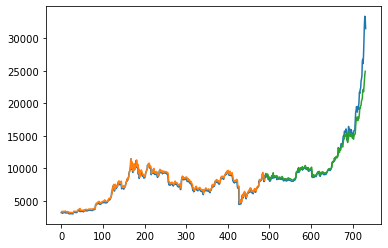

In [44]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()